# Unsupervised Learning of Beijing PM2.5

Machine Learning <br>
Chris Xu <br>
Data Source: https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

import:

In [1]:
import numpy as np
import numpy.random as r
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
#names = ['NO.', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP',
# 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir']
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv')
# out of 43824 samples, there are 2067 missing pm2.5 values
df = df.dropna()
print(df.head(6))
# shuffle the data
df = df.sample(frac=1)
print(df.head(6))

    No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd   Iws  Is  Ir
24  25  2010      1    2     0  129.0   -16  -4.0  1020.0   SE  1.79   0   0
25  26  2010      1    2     1  148.0   -15  -4.0  1020.0   SE  2.68   0   0
26  27  2010      1    2     2  159.0   -11  -5.0  1021.0   SE  3.57   0   0
27  28  2010      1    2     3  181.0    -7  -5.0  1022.0   SE  5.36   1   0
28  29  2010      1    2     4  138.0    -7  -5.0  1022.0   SE  6.25   2   0
29  30  2010      1    2     5  109.0    -7  -6.0  1022.0   SE  7.14   3   0
          No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  \
37570  37571  2014      4   15    10  104.0     7  21.0  1021.0   SE   9.83   
14805  14806  2011      9    9    21   32.0    10  19.0  1022.0   SE   1.79   
9851    9852  2011      2   15    11  214.0    -9  -4.0  1029.0   cv   0.89   
6626    6627  2010     10    4     2   21.0     6  10.0  1018.0   NW   2.68   
10169  10170  2011      2   28    17   20.0   -13   5.0  1025.0   

In [3]:
#only take one sample a day in order to get rid of repeated data
df1 = df[df.hour == 12]
print(df1.head(6))
y = np.array(df1['cbwd'])
x = np.array(df1[['pm2.5','DEWP','TEMP','PRES', 'Iws', 'Is', 'Ir']])
print(y.shape)
n = y.shape[0]
#y = y.reshape(n,1)
print(y.shape)
for i in range(y.shape[0]):
    if y[i] == 'cv' or y[i] == 'SE':
        y[i] = 0
    elif y[i] == 'NE' or y[i] == 'NW':
        y[i] = 1

          No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd     Iws  \
37860  37861  2014      4   27    12   20.0     1  23.0  1021.0   NE   17.88   
18660  18661  2012      2   17    12   19.0   -23  -1.0  1033.0   NW  235.15   
19356  19357  2012      3   17    12  173.0     3   3.0  1013.0   SE   20.12   
7668    7669  2010     11   16    12   90.0    -4  -1.0  1023.0   NW  280.88   
26580  26581  2013      1   12    12  472.0    -9  -3.0  1022.0   SE    1.79   
29172  29173  2013      4   30    12   70.0   -11  26.0  1014.0   NE   27.72   

       Is  Ir  
37860   0   0  
18660   0   0  
19356   0   0  
7668    0   0  
26580   0   0  
29172   0   0  
(1731,)
(1731,)


PCA
code below are modified from https://www.geeksforgeeks.org/ml-principal-component-analysispca/#:~:text=Principal%20Component%20Analysis%20(PCA)%20is,machine%20learning%20for%20predictive%20models.

In [4]:
scalar = StandardScaler()
scalar.fit(x)
x_scaled = scalar.transform(x)

pca = PCA()
pca.fit(x_scaled)
x_trans = pca.transform(x_scaled)
print(x_trans)

[[-1.43575861e-02  6.22264950e-01 -2.70727997e-01 ... -6.14097710e-01
  -5.04293971e-01  3.44749345e-01]
 [ 3.76945092e+00  2.17986876e+00  6.92735860e-02 ...  2.59644973e+00
  -3.76587280e-01  3.15588237e-04]
 [ 1.78465296e-01 -9.46971463e-01  6.07990104e-03 ...  6.75391523e-01
   4.83918535e-01 -8.07552345e-01]
 ...
 [-1.57228257e+00  1.84372223e-01 -1.45049916e-01 ... -1.52376497e-01
  -1.12848660e-01 -1.85141573e-01]
 [-2.34198796e+00  3.24202165e-01 -1.07504503e-01 ... -1.28069661e-01
  -3.76233142e-01 -3.27580452e-01]
 [-3.54540365e-01 -3.50652678e-01 -1.39635723e-01 ... -1.75215596e-01
  -5.73586290e-01 -8.55591170e-02]]


Text(0, 0.5, 'Second Principal Component')

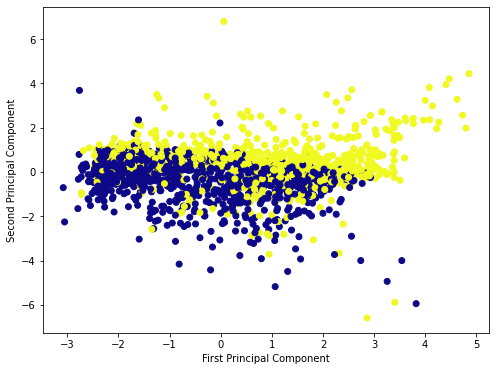

In [5]:
plt.figure(figsize =(8, 6))

plt.scatter(x_trans[:, 0], x_trans[:, 1], c = y, cmap ='plasma')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')